In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [4]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Задание 9.1.**
 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

C:\Users\geras\AppData\Local\Temp\ipykernel_7640\303330324.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


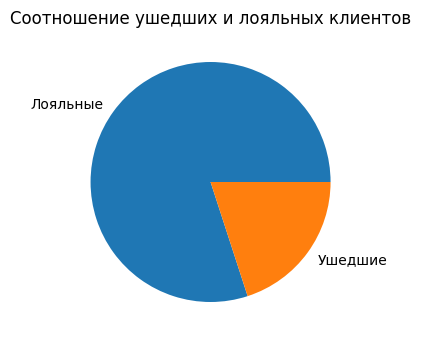

In [19]:
df = churn_data[['Exited']].copy()

# Вычисляем процентное соотношение ушедших
# Округлим результат до целых
df_churn = (df.mean() * 100).round(0).astype(int)

# Строим график
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    [100 - df_churn.values[0], df_churn.values[0]], 
    labels= ['Лояльные', 'Ушедшие']
)

# Добавляем название графика
axes.set_title('Соотношение ушедших и лояльных клиентов')

fig.show()

Исходя из диаграммы видно, что количество ушедших клиентов не превышает 1/4 доли от общего количества клиентов банка. Следовательно можно сделать вывод о том, что у банка присутствуют некоторые проблемы с лояльностью клиентов, однако в большей степени политику банка можно назвать успешной

**Задание 9.2.** Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

C:\Users\geras\AppData\Local\Temp\ipykernel_7640\1251720764.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


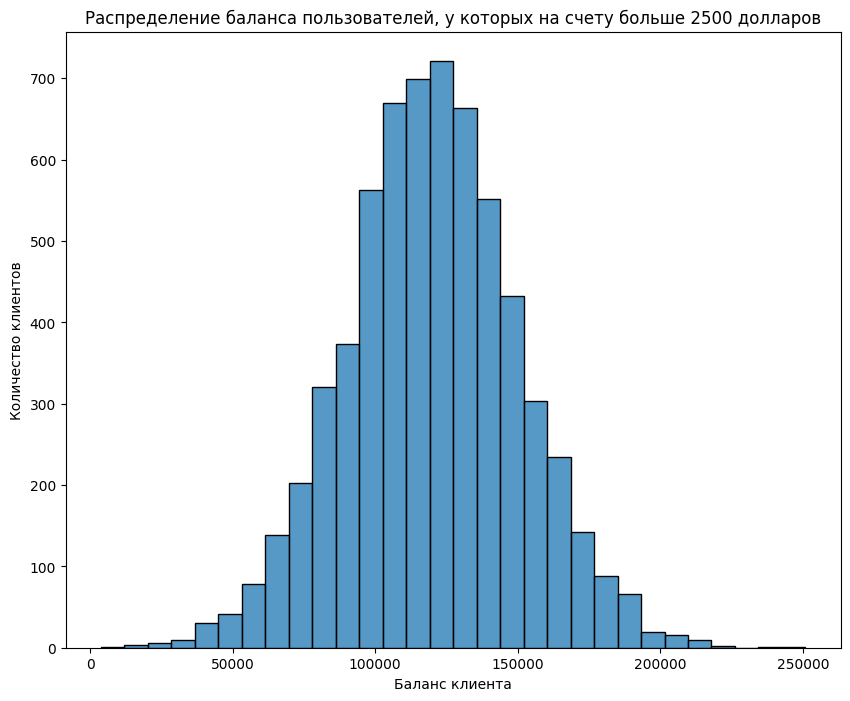

In [21]:
# Фильтруем клиентов с балансом более 2500 долларов
new_balance = churn_data[churn_data['Balance'] > 2500]

# Строим координатную плоскость
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

# Строим график
sns.histplot(
    data=new_balance,
    x='Balance',
    bins=30,
)

axes.set_title('Распределение баланса пользователей, у которых на счету больше 2500 долларов')
axes.set_xlabel('Баланс клиента')
axes.set_ylabel('Количество клиентов')

fig.show()

По графику видно, что у большинства клиентов с балансом более 2500 долларов он находится в диапазоне между 100000 и 150000 долларов. Далее с увеличением суммы, лежащей на счету, количество клиентов заметно снижается

**Задание 9.3.** Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [32]:
# Отбираем необходимые признаки
df_churn = churn_data[['Balance', 'Exited', 'CustomerId']].copy()

# Создадим сводную таблицу, сгруппируем и подпишем данные
df = df_churn.pivot_table(
    index='Balance', # Будущие строки
    columns='Exited', # Будущие столбцы
    values='CustomerId', # Столбец, по которому получим сводные данные для значений
    aggfunc='count' # Функция, применяемая к value - подсчет
)
df = df.rename(columns={1: 'Ушедшие', 0: 'Лояльные'}) # Добавим названия 

# Строим график
fig = px.histogram(
    data_frame=df,
    x=df.index, # Отображаем по оси х баланс клиентов
    y=df.columns, # По оси у - количество клиентов
    nbins=30, # Количество столбцов
    text_auto=True, # Отобразим надписи на столбцах
    title='Зависимость баланса клиентов и их лояльности', # Заголовок
    width=700, # Ширина графика
    height=500, # Высота графика
    labels={'Exited': 'Статус клиента: '} # Легенда
)

# Добовляем метки осей
fig.update_xaxes(title_text='Баланс клиента')
fig.update_yaxes(title_text='Количество клиентов')

fig.show()

Исходя из графика можем сделать следующие выводы:

- Пик в начале графика говорит о том, что в банке большое количество клиентов, у которых на счету лежит небольшая сумма. Это может быть связано с тем, что банк предложил выгодные условия для новых клиентов, и большинство из них остались постоянными.

- Для клиентов, вероятно пользующихся услугами банка регулярно, самое их большое количество приходится на диапазон 95 - 150 тыс долларов. Это относится как к лояльным, так и к ушедшим клиентам. Однако доля ушедших клиентов в этом диапазоне выше, чем за его пределами.

- Малое количество ушедших клиентов по краям графика указывает вероятнее всего на то, что клиенты были заинтересованы в разовом пополнении счета, возможно для получения большего размера процента по вкладу, после чего покинули банк

**Задание 9.4.** Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

**Задание 9.5.** Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

**Задание 9.6.** Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.



*Подсказка*
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

**Задание 9.7.** Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

**Задание 9.8.** Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

**Задание 9.9.** В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

**Задание 9.10.** Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.